![Intro](images/MLTutorial.png)

# Machine Learning Tutorial for Toxicology Research in Python

## Introduction

Welcome to this tutorial on utilizing machine learning for toxicology research! Toxicology is the study of the adverse effects of chemical substances on living organisms. It plays a crucial role in areas such as drug development, environmental science, and public health. Given the complex nature of biological systems and the vast number of substances that need to be analyzed, traditional toxicological experiments can be time-consuming and expensive.

Machine learning provides us with powerful tools to automate and enhance the prediction of toxic effects, which may is enabling quicker and more cost-effective research. This tutorial is aimed at providing an overview of how Python, a popular programming language, can be used for machine learning in the context of toxicology research.

---

### What Will You Learn?

- **Data Preprocessing**: How to clean and prepare datasets for machine learning.
  
- **Molecular Features**: Generate molecular features that serve as inputs for machine learning models.

- **Model Building**: Implement various machine learning algorithms (projections / clustering / regression / classification).

- **Model Evaluation**: Assess the performance of models.

- **Interpretability**: Understand how to interpret the results and identify the key variables that contribute to toxicity.

---

### Who is this tutorial for?

This tutorial is intended for:

- Toxicologists interested in incorporating machine learning for computational toxicology.


---

### Prerequisites

- Basic understanding of Python programming.
- Familiarity with basic concepts in computational toxicology is beneficial but not mandatory.
- Some understanding of machine learning concepts.

---

### Required Libraries

We will be using the following Python libraries:

- *Pandas* for data manipulation.
- *Seaborn* for data visualization.
- *RDKit* for handling molecules.
- *Scikit-learn* for implementing machine learning algorithms.


---

### Dataset

We will work with some publicly available toxicology datasets that contains information on various chemical compounds and their corresponding toxic effects.

- [Open TG-GATEs](https://dbarchive.biosciencedbc.jp/en/open-tggates/download.html)
- [Therapeutics Data Commons](https://tdcommons.ai/)

---

![Pandas](images/DataPreprocessing.png)

# Data Preprocessing with Pandas

## Introduction

Before diving into machine learning algorithms, it's crucial to preprocess our dataset. Data preprocessing includes cleaning the data, dealing with missing values, and transforming variables to a suitable form for modeling. In this section, we'll use Pandas, a powerful library for data manipulation and analysis in Python, to prepare our dataset for machine learning.

---

## Steps Covered

1. **Loading Data**: Import the dataset into a Pandas DataFrame.
2. **Data Inspection**: Overview of the data and its features.
3. **Handling Missing Values**: Deal with any missing or incomplete data.
4. **Data Transformation**: Convert categorical variables to numeric variables.
5. **Data Normalization**: Normalize the feature variables.
6. **Feature Engineering**: Create new features if needed.
7. **Data Splitting**: Split the data into training and testing sets.

---

Frist, let's start by importing the necessary Python libraries:


In [1]:
# Import necessary libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns

Now, let's load a dataset and check the first rows:

In [2]:
# Load the dataset, subset of the Open TG-GATEs biochemistry data
df = pd.read_csv('data/biochem.tab', delimiter="\t")
# Display the first five rows of the dataframe
df.head(5)

,index,EXP_ID,GROUP_ID,INDIVIDUAL_ID,COMPOUND_NAME,SINGLE_REPEAT_TYPE,SACRIFICE_PERIOD,DOSE,DOSE_UNIT,DOSE_LEVEL,...,Cl(meq/L),Ca(mg/dL),IP(mg/dL),TP(g/dL),RALB(g/dL),A/G,AST(IU/L),ALT(IU/L),LDH(IU/L),GTP(IU/L)
0,0,40,1,1,acetaminophen,Single,3 hr,0,mg/kg,Control,...,102.0,10.9,12.1,5.6,3.6,1.8,83.0,50.0,128.0,2.0
1,5,40,2,1,acetaminophen,Single,6 hr,0,mg/kg,Control,...,103.0,11.7,14.3,5.9,3.7,1.7,77.0,34.0,134.0,1.0
2,10,40,3,1,acetaminophen,Single,9 hr,0,mg/kg,Control,...,106.9,10.4,10.0,5.6,3.6,1.8,57.0,32.0,117.0,1.0
3,15,40,4,1,acetaminophen,Single,24 hr,0,mg/kg,Control,...,102.0,10.7,8.5,5.9,4.2,2.5,53.0,37.0,101.0,1.0
4,20,40,11,1,acetaminophen,Single,3 hr,300,mg/kg,Low,...,106.0,10.4,12.1,5.4,3.4,1.7,67.0,32.0,101.0,0.0


**Quickly visualize the data distributionet's take a look under the structure, features, and types of data.**

In [3]:
# Get summary statistics
df.describe()

,index,EXP_ID,GROUP_ID,INDIVIDUAL_ID,DOSE,ALP(IU/L),TC(mg/dL),TG(mg/dL),PL(mg/dL),TBIL(mg/dL),...,Cl(meq/L),Ca(mg/dL),IP(mg/dL),TP(g/dL),RALB(g/dL),A/G,AST(IU/L),ALT(IU/L),LDH(IU/L),GTP(IU/L)
count,4773.000000,4773.000000,4773.000000,4773.000000,4773.000000,4773.000000,4773.000000,4773.000000,4773.00000,4749.000000,...,4773.000000,4773.000000,4773.000000,4773.000000,4773.000000,4773.000000,4773.000000,4773.000000,4773.000000,4773.000000
mean,11827.879321,402.680285,8.517285,1.014247,193.695789,1230.791326,76.750471,94.516007,144.77268,0.130865,...,104.666709,10.653465,8.032634,5.645707,3.192579,1.400949,73.616803,40.622879,139.665619,1.300251
std,6821.436847,181.479590,4.699116,0.168216,481.350823,439.706268,17.833458,54.499042,26.47286,0.222614,...,2.481328,0.481449,1.504690,0.404376,0.530480,0.512761,46.279156,19.231643,116.858081,1.229615
min,0.000000,40.000000,1.000000,1.000000,0.000000,87.000000,12.000000,6.000000,43.00000,0.000000,...,89.000000,5.640000,3.800000,2.400000,1.000000,0.400000,10.000000,5.000000,29.000000,0.000000
25%,5929.000000,251.000000,4.000000,1.000000,0.000000,885.000000,67.000000,53.000000,130.00000,0.020000,...,103.000000,10.400000,6.900000,5.400000,2.700000,0.900000,62.000000,33.000000,81.000000,1.000000
50%,11838.000000,419.000000,8.000000,1.000000,30.000000,1201.000000,76.000000,84.000000,143.00000,0.060000,...,105.000000,10.700000,7.800000,5.600000,3.100000,1.300000,68.000000,38.000000,118.000000,1.000000
75%,17731.000000,553.000000,13.000000,1.000000,150.000000,1520.000000,85.000000,125.000000,158.00000,0.170000,...,106.000000,10.900000,9.100000,5.900000,3.600000,1.700000,75.000000,44.000000,174.000000,2.000000
max,23639.000000,745.000000,24.000000,5.000000,9999.000000,4829.000000,508.000000,455.000000,721.00000,5.080000,...,119.000000,19.700000,21.000000,7.800000,4.900000,3.700000,1132.000000,474.000000,3461.000000,47.000000


In [4]:
# Get data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4773 entries, 0 to 4772
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               4773 non-null   int64  
 1   EXP_ID              4773 non-null   int64  
 2   GROUP_ID            4773 non-null   int64  
 3   INDIVIDUAL_ID       4773 non-null   int64  
 4   COMPOUND_NAME       4773 non-null   object 
 5   SINGLE_REPEAT_TYPE  4773 non-null   object 
 6   SACRIFICE_PERIOD    4773 non-null   object 
 7   DOSE                4773 non-null   int64  
 8   DOSE_UNIT           4773 non-null   object 
 9   DOSE_LEVEL          4773 non-null   object 
 10  ALP(IU/L)           4773 non-null   float64
 11  TC(mg/dL)           4773 non-null   float64
 12  TG(mg/dL)           4773 non-null   float64
 13  PL(mg/dL)           4773 non-null   float64
 14  TBIL(mg/dL)         4749 non-null   float64
 15  DBIL(mg/dL)         4749 non-null   float64
 16  GLC(mg

|   |   |
|---|---|
|EXP_ID | ID assigned to each test which can be indentified by a combination of COMPOUND_NAME, SPECIES, EXP_TEST_TYPE, and SINGLE_REPEAT_TYPE. IDs for in vivo tests are assigned from #0040. IDs for in vitro tests are assigned from #5000.|
|GROUP_ID | ID assigned to each group which can be indentified by a combination of DOSE_LEVEL and SACRIFICE_PERIOD. IDs are in double digits. (e.g. 01, 16)|
|INDIVIDUAL_ID |	ID assigned to each individual within a group. IDs are in single digit.|
|COMPOUND_NAME |	Compound name|
|SINGLE_REPEAT_TYPE |	Type of in vivo test. Single-dose test or 28-day repeat-dose test.|
|SACRIFICE_PERIOD |	Sampling time or period on in vivo test.|
|DOSE | Dose|
|DOSE_UNIT | Unit of dose|
|DOSE_LEVEL | Dose level. The ascending order of the levels is Control, Low, Middle, High.|
|ALP(IU/L) | alkaline phosphatase|
|TC(mg/dL) | total cholesterol|
|TG(mg/dL) | triglyceride|
|PL(mg/dL) | phospholipid|
|TBIL(mg/dL) | total bilirubin|
|DBIL(mg/dL) | direct bilirubin|
|GLC(mg/dL) | glucose|
|BUN(mg/dL) | blood urea nitrogen|
|CRE(mg/dL) | creatinine|
|Na(meq/L) | sodium|
|K(meq/L) | potassium|
|Cl(meq/L) | chlorine|
|Ca(mg/dL) | calcium|
|IP(mg/dL) | inorganic phosphorus|
|TP(g/dL) | total protein|
|RALB(g/dL) | albumin|
|A/G	albumin | globulin ratio|
|AST(IU/L) | aspartate aminotransferase|
|ALT(IU/L) | alanine aminotransferase|
|LDH(IU/L) | lactate dehydrogenase|
|GTP(IU/L) | γ-glutamyltranspeptidase|

**Visualize the data distribution, e.g. for outlier detection:**

<Axes: xlabel='ALP(IU/L)', ylabel='Density'>

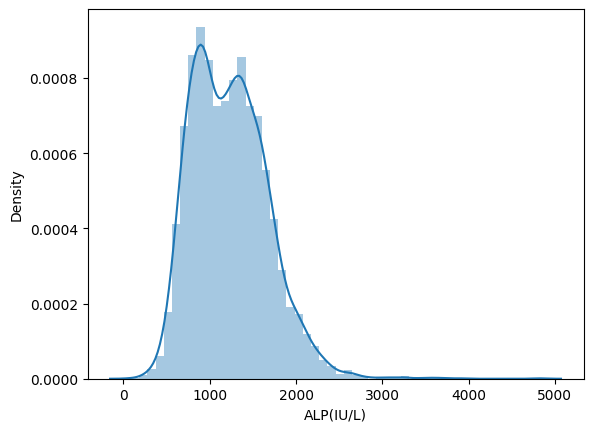

In [5]:
# Apply seaborn distplot to show the data distribution
sns.distplot(df["ALP(IU/L)"])

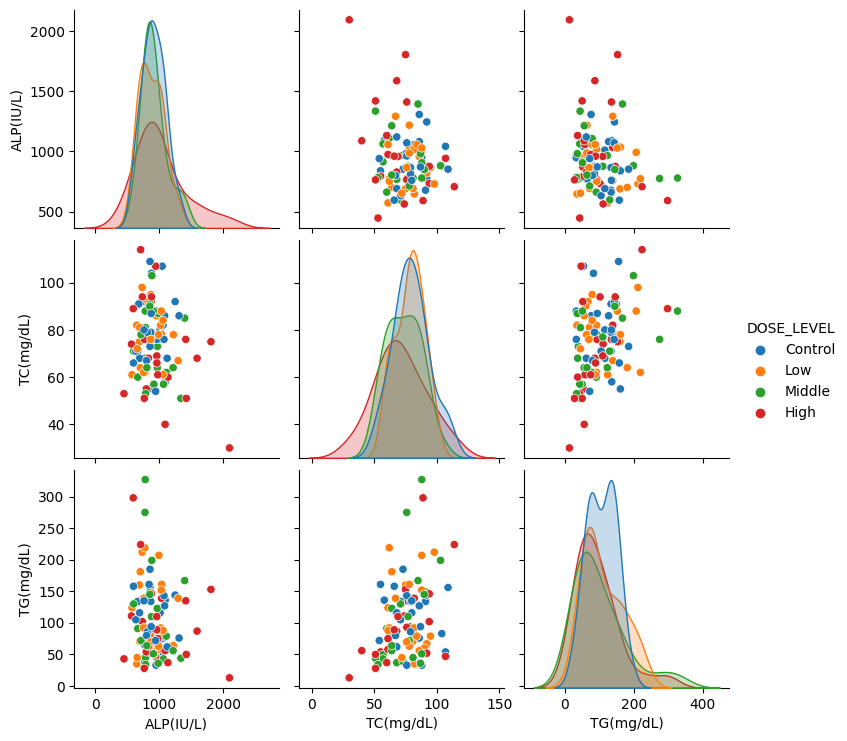

In [6]:
sns.pairplot(df.iloc[:100],
             x_vars =['ALP(IU/L)', 'TC(mg/dL)', 'TG(mg/dL)'],
             y_vars =['ALP(IU/L)', 'TC(mg/dL)', 'TG(mg/dL)'],
             hue="DOSE_LEVEL")

## Handling Missing Values

Do we have missing values in the dataset? Let's deal with them by imputing or removing the missing values.  

In [7]:
# Check for missing values:
df.isna().sum()

index                  0
EXP_ID                 0
GROUP_ID               0
INDIVIDUAL_ID          0
COMPOUND_NAME          0
SINGLE_REPEAT_TYPE     0
SACRIFICE_PERIOD       0
DOSE                   0
DOSE_UNIT              0
DOSE_LEVEL             0
ALP(IU/L)              0
TC(mg/dL)              0
TG(mg/dL)              0
PL(mg/dL)              0
TBIL(mg/dL)           24
DBIL(mg/dL)           24
GLC(mg/dL)             0
BUN(mg/dL)             0
CRE(mg/dL)             0
Na(meq/L)              0
K(meq/L)               0
Cl(meq/L)              0
Ca(mg/dL)              0
IP(mg/dL)              0
TP(g/dL)               0
RALB(g/dL)             0
A/G                    0
AST(IU/L)              0
ALT(IU/L)              0
LDH(IU/L)              0
GTP(IU/L)              0
dtype: int64

In [8]:
# Fill missing values->  use fillna() to fill missing value with median imputed value 
df["DBIL(mg/dL)"].fillna(df["DBIL(mg/dL)"].median(), inplace=True)

In [9]:
# Remove missing values->  use drop() to delete ROWS based on column value
df.drop(df[df["TBIL(mg/dL)"].isna()].index, inplace = True)

In [10]:
df.isna().sum()

index                 0
EXP_ID                0
GROUP_ID              0
INDIVIDUAL_ID         0
COMPOUND_NAME         0
SINGLE_REPEAT_TYPE    0
SACRIFICE_PERIOD      0
DOSE                  0
DOSE_UNIT             0
DOSE_LEVEL            0
ALP(IU/L)             0
TC(mg/dL)             0
TG(mg/dL)             0
PL(mg/dL)             0
TBIL(mg/dL)           0
DBIL(mg/dL)           0
GLC(mg/dL)            0
BUN(mg/dL)            0
CRE(mg/dL)            0
Na(meq/L)             0
K(meq/L)              0
Cl(meq/L)             0
Ca(mg/dL)             0
IP(mg/dL)             0
TP(g/dL)              0
RALB(g/dL)            0
A/G                   0
AST(IU/L)             0
ALT(IU/L)             0
LDH(IU/L)             0
GTP(IU/L)             0
dtype: int64

## Data Transformation

Next, we'll convert categorical variables (e.g. dosage concentrations) to numerical form using one-hot encoding.

In [11]:
pd.get_dummies(df.DOSE_LEVEL)

,Control,High,Low,Middle
0,True,False,False,False
1,True,False,False,False
2,True,False,False,False
3,True,False,False,False
4,False,False,True,False
...,...,...,...,...
4768,False,False,False,True
4769,False,True,False,False
4770,False,True,False,False
4771,False,True,False,False


## Data Normalization

We'll normalize the feature variables to ensure that they contribute equally to the model's performance.

In [12]:
cols_to_scale = list(df.columns[10:])

In [13]:
cols_to_scale

['ALP(IU/L)',
 'TC(mg/dL)',
 'TG(mg/dL)',
 'PL(mg/dL)',
 'TBIL(mg/dL)',
 'DBIL(mg/dL)',
 'GLC(mg/dL)',
 'BUN(mg/dL)',
 'CRE(mg/dL)',
 'Na(meq/L)',
 'K(meq/L)',
 'Cl(meq/L)',
 'Ca(mg/dL)',
 'IP(mg/dL)',
 'TP(g/dL)',
 'RALB(g/dL)',
 'A/G',
 'AST(IU/L)',
 'ALT(IU/L)',
 'LDH(IU/L)',
 'GTP(IU/L)']

Standardize features by removing the mean and scaling to unit variance.

[List of other scalers](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [15]:
df[cols_to_scale].head(5)

,ALP(IU/L),TC(mg/dL),TG(mg/dL),PL(mg/dL),TBIL(mg/dL),DBIL(mg/dL),GLC(mg/dL),BUN(mg/dL),CRE(mg/dL),Na(meq/L),...,Cl(meq/L),Ca(mg/dL),IP(mg/dL),TP(g/dL),RALB(g/dL),A/G,AST(IU/L),ALT(IU/L),LDH(IU/L),GTP(IU/L)
0,-0.801735,1.525128,-0.211523,1.026578,0.714921,0.027050,0.123625,0.184702,-0.095705,0.093360,...,-1.072933,0.518514,2.732723,-0.111857,0.763305,0.773223,0.201282,0.485540,-0.100930,0.567572
1,-0.424141,1.693351,-0.743135,1.328858,0.894623,0.098776,0.123625,0.184702,0.485801,1.041438,...,-0.670303,2.184269,4.209244,0.631580,0.951935,0.578096,0.071918,-0.344679,-0.049660,-0.244075
2,-1.042850,0.852237,-0.541489,0.497587,0.714921,0.529130,0.037306,-0.196099,-0.095705,0.946630,...,0.899952,-0.522583,1.323317,-0.111857,0.763305,0.773223,-0.359293,-0.448456,-0.194926,-0.244075
3,-0.496930,0.179346,0.393414,0.686512,0.310591,0.027050,0.727852,0.184702,-0.095705,-0.854717,...,-1.072933,0.102075,0.316599,0.631580,1.895084,2.139111,-0.445535,-0.189013,-0.331647,-0.244075
4,-0.929116,0.852237,-0.504826,0.195306,0.265665,0.027050,0.771011,-0.323032,-0.677212,0.567399,...,0.537586,-0.522583,2.732723,-0.607483,0.386046,0.578096,-0.143687,-0.448456,-0.331647,-1.055722


## Merging DataFrames to Add Chemical Information

We might have separate datasets - one containing the experimental measurements of various substances and another detailing specific chemical stuctures of these substances. To gain a holistic view and create a rich feature set for our machine learning models, we might need to merge these datasets. Let's dive into how we can achieve this using Pandas.

### Steps Covered:

1. **Loading the Chemical Information Dataset**: Import the new dataset into a Pandas DataFrame.
2. **Inspecting the New Dataset**: Understand its structure and features.
3. **Merging DataFrames**: Combine the experimental readouts and chemical structure datasets.
4. **Post-merge Inspection**: Ensure the merge was successful.

---

Let's start by loading and inspecting the chemical structure dataset.

In [16]:
# Load the chemical info dataset
# Replace 'chemical_info.csv' with the path to your actual dataset
chemical_df = pd.read_csv('data/tg_gates.tab', delimiter="\t")

# Display the first few rows of the new dataframe
chemical_df.head()

,CHEMBLID,PubChem CID,Compound,StdInChIKey,CANONICAL_SMILES
0,CHEMBL273386,1493,"2,4-dinitrophenol",UFBJCMHMOXMLKC-UHFFFAOYSA-N,Oc1ccc(cc1[N+](=O)[O-])[N+](=O)[O-]
1,CHEMBL351487,11831,2-nitrofluorene,XFOHWECQTFIEIX-UHFFFAOYSA-N,[O-][N+](=O)c1ccc2c(Cc3ccccc23)c1
2,CHEMBL1566,444254,acarbose,XUFXOAAUWZOOIT-SXARVLRPSA-N,C[C@H]1O[C@H](O[C@H]2[C@H](O)[C@@H](O)[C@@H](O...
3,CHEMBL16081,178,acetamide,DLFVBJFMPXGRIB-UHFFFAOYSA-N,CC(=O)N
4,CHEMBL311469,5897,acetamidofluorene,CZIHNRWJTSTCEX-UHFFFAOYSA-N,CC(=O)Nc1ccc2c(Cc3ccccc23)c1


### Merging DataFrames

The key to merging datasets in Pandas is to have a common column (often called a "key") that exists in both datasets. This common column serves as a reference to align the two datasets. For our context, let's assume both dataframes have different column names. In dataframe `chemical_df` the keys are in the column `Compound` while in the dataframe `df` they called `COMPOUND_NAME`.
We'll perform an inner merge. This type of merge ensures that only rows with matching keys in both dataframes are retained in the merged dataframe.

In [17]:
# Merging the datasets on 'Chemical_ID'
merged_df = pd.merge(df, chemical_df, left_on="COMPOUND_NAME", right_on="Compound", how='inner')

# Display the first few rows of the merged dataframe
merged_df.head(5)

,index,EXP_ID,GROUP_ID,INDIVIDUAL_ID,COMPOUND_NAME,SINGLE_REPEAT_TYPE,SACRIFICE_PERIOD,DOSE,DOSE_UNIT,DOSE_LEVEL,...,A/G,AST(IU/L),ALT(IU/L),LDH(IU/L),GTP(IU/L),CHEMBLID,PubChem CID,Compound,StdInChIKey,CANONICAL_SMILES
0,0,40,1,1,acetaminophen,Single,3 hr,0,mg/kg,Control,...,0.773223,0.201282,0.485540,-0.100930,0.567572,CHEMBL112,1983,acetaminophen,RZVAJINKPMORJF-UHFFFAOYSA-N,CC(=O)Nc1ccc(O)cc1
1,5,40,2,1,acetaminophen,Single,6 hr,0,mg/kg,Control,...,0.578096,0.071918,-0.344679,-0.049660,-0.244075,CHEMBL112,1983,acetaminophen,RZVAJINKPMORJF-UHFFFAOYSA-N,CC(=O)Nc1ccc(O)cc1
2,10,40,3,1,acetaminophen,Single,9 hr,0,mg/kg,Control,...,0.773223,-0.359293,-0.448456,-0.194926,-0.244075,CHEMBL112,1983,acetaminophen,RZVAJINKPMORJF-UHFFFAOYSA-N,CC(=O)Nc1ccc(O)cc1
3,15,40,4,1,acetaminophen,Single,24 hr,0,mg/kg,Control,...,2.139111,-0.445535,-0.189013,-0.331647,-0.244075,CHEMBL112,1983,acetaminophen,RZVAJINKPMORJF-UHFFFAOYSA-N,CC(=O)Nc1ccc(O)cc1
4,20,40,11,1,acetaminophen,Single,3 hr,300,mg/kg,Low,...,0.578096,-0.143687,-0.448456,-0.331647,-1.055722,CHEMBL112,1983,acetaminophen,RZVAJINKPMORJF-UHFFFAOYSA-N,CC(=O)Nc1ccc(O)cc1


### Post-merge Inspection

After merging datasets, it's advisable to review the combined data. This step ensures the integrity of the data remains intact post-merge.

In [18]:
# Checking the shape (number of rows, number of columns) of the merged dataframe
print("Chemical Info DataFrame shape:", chemical_df.shape)
print("Measurements DataFrame shape:", df.shape)
print("Merged DataFrame shape:", merged_df.shape)

Chemical Info DataFrame shape: (151, 5)
Measurements DataFrame shape: (4749, 31)
Merged DataFrame shape: (4286, 36)


In [19]:
# Get names of the new columns
new_columns = set(merged_df.columns) - set(df.columns) # set gives collection of unique elements, unordered, and without duplicates
print("New columns:", new_columns)

New columns: {'Compound', 'CHEMBLID', 'StdInChIKey', 'CANONICAL_SMILES', 'PubChem CID'}


In [20]:
print("Any missing values: \n", merged_df.isna().sum())

Any missing values: 
 index                 0
EXP_ID                0
GROUP_ID              0
INDIVIDUAL_ID         0
COMPOUND_NAME         0
SINGLE_REPEAT_TYPE    0
SACRIFICE_PERIOD      0
DOSE                  0
DOSE_UNIT             0
DOSE_LEVEL            0
ALP(IU/L)             0
TC(mg/dL)             0
TG(mg/dL)             0
PL(mg/dL)             0
TBIL(mg/dL)           0
DBIL(mg/dL)           0
GLC(mg/dL)            0
BUN(mg/dL)            0
CRE(mg/dL)            0
Na(meq/L)             0
K(meq/L)              0
Cl(meq/L)             0
Ca(mg/dL)             0
IP(mg/dL)             0
TP(g/dL)              0
RALB(g/dL)            0
A/G                   0
AST(IU/L)             0
ALT(IU/L)             0
LDH(IU/L)             0
GTP(IU/L)             0
CHEMBLID              0
PubChem CID           0
Compound              0
StdInChIKey           0
CANONICAL_SMILES      0
dtype: int64


In [21]:
# Set Operations: You can perform set operations like union, intersection, difference, and symmetric difference. Here we use set to check for differences.
set(df.COMPOUND_NAME).difference(set(chemical_df.Compound))

{'1% cholesterol + 0.25% sodium cholate',
 '3-methylcholanthrene',
 'LPS',
 'N-methyl-N-nitrosourea',
 'N-nitrosomorpholine',
 'TNF\x83¿',
 'WY-14643',
 'aflatoxin B1',
 'amphotericin B',
 'bortezomib',
 'carboplatin',
 'cephalothin',
 'cisplatin',
 'cyclosporine A',
 'desmopressin acetate',
 'gefitinib',
 'gentamicin',
 'imatinib, methanesulfonate salt',
 'puromycin aminonucleoside',
 'triamterene',
 'vitamin A'}

## Data Splitting

Finally, let's randomly split the data into training and testing set

In [22]:
# Splitting the data into training and testing sets 
from sklearn.model_selection import train_test_split

X = merged_df.drop(cols_to_scale, axis=1)
y = merged_df[cols_to_scale]

# Splitting the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, )

In [23]:
comp_intersect = set(X_train.CANONICAL_SMILES).intersection(set(X_test.CANONICAL_SMILES))
list(comp_intersect)[:5] 

['COc1ccc2cc(ccc2c1)[C@H](C)C(=O)O',
 'CCCCNC(=O)NS(=O)(=O)c1ccc(C)cc1',
 'CCSCC[C@H](N)C(=O)O',
 'CCOC(=O)[C@H](CCc1ccccc1)N[C@@H](C)C(=O)N2CCC[C@H]2C(=O)O',
 'OC(=O)C1=CN(C2CC2)c3cc(N4CCNCC4)c(F)cc3C1=O']

Oops! In the way this data is split, there's unintended information leakage between the test and training sets. The compounds shouldn't overlap between the sets.

In [24]:
# Splitting the data into training and testing sets in a groupwise way:
from sklearn.model_selection import LeavePGroupsOut
lpgo = LeavePGroupsOut(n_groups=30) # each compound has a group membership, we now pick randomly 30 compounds and make sure, that they don't overlap
enumerator = enumerate(lpgo.split(X, y, merged_df.CANONICAL_SMILES))
run_index, (train_index, test_index) = next(enumerator)


In [25]:
X_train = X.iloc[train_index]
X_test = X.iloc[test_index]
y_train = y.iloc[train_index]
y_test= y.iloc[test_index]

In [26]:
set(X_train.CANONICAL_SMILES).intersection(set(X_test.CANONICAL_SMILES))

set()

---

## Conclusion first section

We have successfully preprocessed the dataset. The data is now clean, transformed, merged with chemical information, splitted and ready for machine learning modeling.

In the next section, we'll dive into feature engineering and selection to better inform our machine learning model.

---

![RDKit](images/MolecularFeatures.png)

# Generating Molecular Features using RDKit

Chemoinformatics is a field that utilizes computational techniques to aid in understanding the chemistry and biology of molecules. RDKit is a powerful tool that provides a collection of cheminformatics and machine learning tools. In this section, we will utilize RDKit to generate molecular features that can enhance the predictive power of our machine learning models.

## Steps Covered:

1. **Installing RDKit**: Setting up RDKit in our environment.
2. **Converting Chemical Information**: Transforming chemical data into RDKit-readable format.
3. **Generating Molecular Descriptors**: Creating molecular features using RDKit.
4. **Adding Features to DataFrame**: Integrating the generated features into our existing dataset.

---

## Installing RDKit

RDKit isn't included in the default Jupyter environment, so we'll need to install it. Typically, RDKit is installed using Conda or pip. However, for the purpose of this tutorial, we'll assume it's already installed. If not, you can install it via pip:

```bash
pip install rdkit

Let's start by importing the necessary modules from RDKit.

In [27]:
from rdkit import Chem
from rdkit.Chem import Descriptors

## Converting Chemical Information

For RDKit to generate molecular descriptors, we first need to convert our chemical information, typically given as SMILES strings, into RDKit-readable molecular objects.

In [28]:
# 'CANONICAL_SMILES' column contains the CANONICAL_SMILES strings in our merged dataframe
chemical_df['Molecule'] = chemical_df['CANONICAL_SMILES'].apply(Chem.MolFromSmiles)

In [29]:
chemical_df.head()

,CHEMBLID,PubChem CID,Compound,StdInChIKey,CANONICAL_SMILES,Molecule
0,CHEMBL273386,1493,"2,4-dinitrophenol",UFBJCMHMOXMLKC-UHFFFAOYSA-N,Oc1ccc(cc1[N+](=O)[O-])[N+](=O)[O-],<rdkit.Chem.rdchem.Mol object at 0x198989e00>
1,CHEMBL351487,11831,2-nitrofluorene,XFOHWECQTFIEIX-UHFFFAOYSA-N,[O-][N+](=O)c1ccc2c(Cc3ccccc23)c1,<rdkit.Chem.rdchem.Mol object at 0x198989d90>
2,CHEMBL1566,444254,acarbose,XUFXOAAUWZOOIT-SXARVLRPSA-N,C[C@H]1O[C@H](O[C@H]2[C@H](O)[C@@H](O)[C@@H](O...,<rdkit.Chem.rdchem.Mol object at 0x198989e70>
3,CHEMBL16081,178,acetamide,DLFVBJFMPXGRIB-UHFFFAOYSA-N,CC(=O)N,<rdkit.Chem.rdchem.Mol object at 0x198989ee0>
4,CHEMBL311469,5897,acetamidofluorene,CZIHNRWJTSTCEX-UHFFFAOYSA-N,CC(=O)Nc1ccc2c(Cc3ccccc23)c1,<rdkit.Chem.rdchem.Mol object at 0x198989f50>


## Integrating RDKit with pandas using pandasTools

While RDKit allows us to generate molecular features from chemical information, working with it alongside pandas can be streamlined using `pandasTools`. This library acts as a bridge, making it simpler to handle RDKit's molecular objects within pandas DataFrames and also provides utilities for visualization.


In [30]:
from rdkit.Chem import PandasTools
PandasTools.RenderImagesInAllDataFrames(images=True)

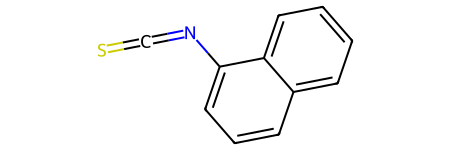

In [31]:
chemical_df.Molecule[23]

## Generating Physical Molecular Descriptors

RDKit provides a plethora of molecular descriptors. For simplicity, below a n uncomplete table with some of them:

| Descriptor Name                  | Description                                                                                              |
|---------------------------------|----------------------------------------------------------------------------------------------------------|
| Molecular Weight (MolWt)        | Calculates the molecular weight of a molecule.                                                            |
| Number of Atoms (NumAtoms)      | Counts the number of atoms in a molecule.                                                                 |
| Number of Bonds (NumBonds)      | Counts the number of bonds in a molecule.                                                                 |
| TPSA (TPSA)                     | Topological Polar Surface Area.                                                                           |
| Number of Rotatable Bonds (NumRotatableBonds) | Counts the number of rotatable bonds.                                                                 |
| Number of H-Bond Donors (NumHDonors) | Counts the number of H-bond donors.                                                                    |
| Number of H-Bond Acceptors (NumHAcceptors) | Counts the number of H-bond acceptors.                                                                 |
| Molecular LogP (MolLogP)        | Predicts the octanol-water partition coefficient.                                                         |
| Molecular MR (MolMR)            | Molar refractivity. 

In [32]:
# Example descriptors
chemical_df['MolWt'] = chemical_df['Molecule'].apply(Descriptors.MolWt)
chemical_df['NumValenceElectrons'] = chemical_df['Molecule'].apply(Descriptors.NumValenceElectrons)
chemical_df['MaxPartialCharge'] = chemical_df['Molecule'].apply(Descriptors.MaxPartialCharge)
chemical_df['MinPartialCharge'] = chemical_df['Molecule'].apply(Descriptors.MinPartialCharge)
chemical_df['NumRadicalElectrons'] = chemical_df['Molecule'].apply(Descriptors.NumRadicalElectrons)

## Extended-Connectivity Fingerprints (ECFP)
ECFP are used for molecular characterization, particularly in cheminformatics for drug discovery. ECFP generates molecular fingerprints by considering the atom's environment in a molecule. They are circular in the sense that they capture substructural information centered at each atom and extend radially outwards, encompassing neighboring atoms. ECFPs are the working horse in cheminformatics and widely used.

![ECPF](images/ECFP.png)

(Image taken from Liu et al. 10.1038/aps.2014.35.)

**Benefits of ECFP Fingerprints:**

- They can capture detailed substructural information.
- They are useful for similarity searches, virtual screening, and clustering of large chemical databases.
- They have been shown to perform well in various cheminformatics tasks.



In [33]:
from rdkit.Chem import AllChem
import numpy as np

radius = 2
nBits = 1024
# converts molecule object to ECFP as a new column 
chemical_df['ECFP'] = chemical_df['Molecule'].apply(AllChem.GetMorganFingerprintAsBitVect, args=(radius, nBits)) 
# converts bitstring to list 
chemical_df['ECFP'] = chemical_df['ECFP'].apply(lambda x: np.asarray(x.ToList()))

## Conclusion

RDKit has emerged as an indispensable tool for working with chemical structures. This open-source cheminformatics toolkit enabled us to handle, analyze and visualization molecular structures effortlessly.  

---

![Intro_ML](images/Intro_ML.png)

# Introduction to Machine Learning Paradigms: Projections, Clustering, Regression, and Classification

The beauty of machine learning is the broad array of tools it offers, each tailored to address specific types of tasks. Some of the most predominant techniques are **Projections**, **Clustering**, **Regression**, and  **Classification**.  Below their unique characteristics and differences.


**Projections**

<img src="images/lda.png" alt="Projections" width="40%" height="auto">

Projections are techniques used to reduce the dimensionality of data by transforming high-dimensional data into a lower-dimensional form, making it more understandable and easier to visualize. By projecting data into fewer dimensions, one can often discern patterns or structures that might be obscured in the high-dimensional space. The goal is not merely to simplify data but to capture its essence, preserving as much of its significant structure as possible. Projections are fundamental in handling large datasets, as visualizing data in 3D or beyond is challenging.

**Key Characteristics**:
- **Dimensionality Reduction**: Projects data from a higher-dimensional space to a lower one.
- **Visualization**: Helps in visualizing high-dimensional data in 2D or 3D plots.
- **Preserves Data Structure**: Tries to maintain the relationships and distances between data points.
- **Examples**: Principal Component Analysis (PCA), t-Distributed Stochastic Neighbor Embedding (t-SNE), and Linear Discriminant Analysis (LDA).


Projections like PCA can compress information, while techniques like t-SNE are more about visualizing clusters or groups in data. Choosing the right projection method often depends on the nature of the data and the specific goals of the analysis.

---


**Clustering**

<img src="images/clustering.png" alt="image" width="80%" height="auto">

(Source: Ursus Wehrli)

Clustering is a type of **unsupervised learning** where the goal is to group similar data points together based on certain features, without having previously labeled data. In simpler terms, it's like organizing a portion of fires on their types, even when you're not told beforehand what these types are.

**Key Characteristics**:
- **No Labels Required**: Clustering doesn't need any training with labeled data.
- **Data Exploration**: Often used to discover structures, patterns, and relationships within the data.
- **Examples**: K-Means clustering, Hierarchical clustering, and DBSCAN.

---

**Regression**

<img src="images/regression.png" alt="Regression" width="40%" height="auto">

Regression revolves around predicting a **continuous output variable** based on one or more input features. Think of it as predicting the price of a house based on features like its size, location, or age. Regression is a **supervised learning** technique, which means it requires labeled data to train the model.

**Key Characteristics**:
- **Continuous Output**: Predicts a value within a range.
- **Dependent on Input Features**: The output value is derived from known input features.
- **Examples**: Linear Regression, Support Vector Machines, and Neural Networks

---

**Classification**

<img src="images/classification.png" alt="Classification" width="40%" height="auto">

Classification, also a form of **supervised learning**, aims at predicting discrete output labels or categories based on given input features. For instance, determining if an email is spam or not spam is a classification problem.

**Key Characteristics**:
- **Discrete Output**: Categorizes input data into distinct classes.
- **Requires Labeled Data**: Classification models need labeled examples to learn the relationships between input features and output categories.
- **Examples**: Logistic Regression, Support Vector Machines, and Neural Networks.


---

## Model Building with scikit-learn

In this section, we'll dive into the basics of model building using the `scikit-learn` library. We'll explore four primary machine learning tasks:

- **Projections**  - Techniques used to reduce the dimensionality:
- **Clustering** - Unsupervised learning to group data points into clusters.
- **Regression** - Predict a continuous target variable based on input features.
- **Classification** - Categorize data into predefined classes.

### Prerequisites:

Ensure that you've installed scikit-learn:

```bash
pip install scikit-learn

---
![Projections](images/Projections.png)


##  Projections

### Linear Discriminant Analysis (LDA) 

LDA is a technique used in both dimensionality reduction and classification. As a dimensionality reduction technique, LDA works by projecting the input data into a lower-dimensional space where classes are most separable.

LDA seeks to:
1. Maximize the distance between the means of different classes.
2. Minimize the spread (i.e., the scatter) within each category.

**Advantages of LDA**
- Reduces dimensionality.
- Preserves as much class discriminatory information as possible.

LDA is supervised method, thus we need labels. We generate them based on molecular weight of the molecule. 0: <200, 1: 200-300, and 2 : >300

In [34]:
y = pd.cut(chemical_df.MolWt, [0,200,300,5000], labels=[0, 1, 2], ordered= False)

Applying LDA

In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt


# generate two classes bases on the molecular weight
#y = chemical_df.MolWt.apply(lambda x: int(x > 200) + int(x > 300))
X = chemical_df[['NumValenceElectrons', 'MaxPartialCharge', 'MinPartialCharge']]


lda = LinearDiscriminantAnalysis(n_components=2)  # Reducing data to 2 components for visualization
X_r2 = lda.fit(X, y).transform(X)

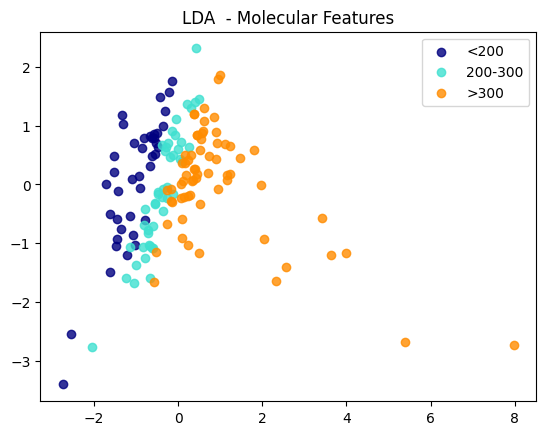

In [36]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], ['<200','200-300', '>300']):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA  - Molecular Features')
plt.show()

In [37]:
X = np.array(chemical_df.ECFP.to_list())

lda = LinearDiscriminantAnalysis(n_components=2)  # Reducing data to 2 components for visualization
X_r2 = lda.fit(X, y).transform(X)

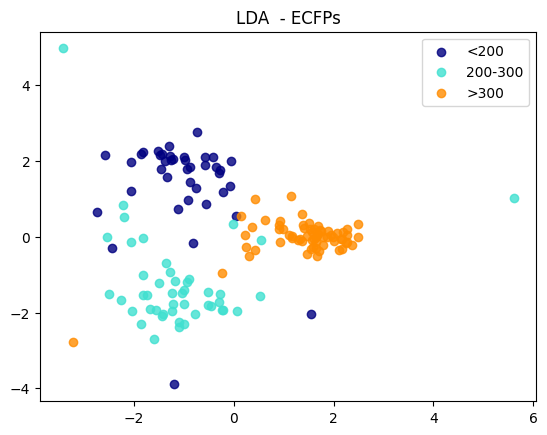

In [38]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], ['<200','200-300', '>300']):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA  - ECFPs')
plt.show()

#### Conclusion:

LDA is a powerful technique for dimensionality reduction, especially when the primary goal is to separate classes in a dataset. It combines both feature extraction and classification, making it especially handy for tasks with well-defined categories.
Linear Discriminant Analysis (LDA) is grounded in certain assumptions. When these assumptions are violated, the effectiveness of LDA might be compromised. Let's explore these assumptions and examples of how they can be violated:

**Normality**:
- **Assumption:** LDA assumes that the independent variables are normally distributed within each class.
- **Violation Example:** If you have a dataset where the features for each class are not normally distributed, for example, if they are heavily skewed or bimodal, this assumption is violated.

**Homogeneity of Covariance**:
- **Assumption:** LDA assumes that all classes have identical covariance matrices.
- **Violation Example:** Consider a two-class problem where one class is spread out over a large area while the other class is clustered tightly in a small region. This would indicate differing covariance matrices between the two classes.

**Independent Observations**:
- **Assumption:** Observations are assumed to be independent of each other.
- **Violation Example:** If your dataset contains multiple measurements from the same subjects (e.g., repeated measurements from the same individual), then the independence of observations might be compromised.

**Linear Separability**:
- **Assumption:** LDA assumes that classes can be separated by a linear boundary.
- **Violation Example:** If the data structure is such that classes are not linearly separable (e.g., one class is surrounded by another class in a ring-like fashion), LDA might struggle to provide an effective boundary.


Always remember to visualize your data when possible and apply domain knowledge to validate any assumptions. Even when certain assumptions are violated, LDA might still provide valuable results, but it's essential to be aware of potential issues.

----
### Principal Component Analysis (PCA)


Principal Component Analysis (PCA) is a dimensionality reduction technique that is widely used in machine learning and data visualization. It transforms the original variables into a new set of variables, called principal components, which are orthogonal (uncorrelated), and which reflect the maximum variance in the data.

**Advantages of PCA:**
- Reduces the dimensionality of the data, which can improve model performance and reduce training time.
- Removes multicollinearity by producing uncorrelated principal components.
- Helps in visualizing high-dimensional data.

**PCA Implementation in Python using `sklearn`:**


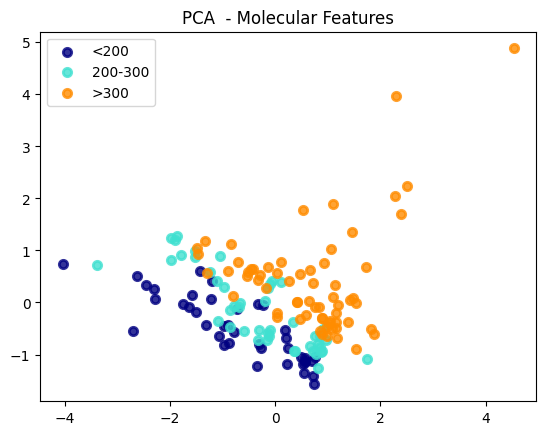

In [39]:
# Importing necessary libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = chemical_df[['NumValenceElectrons', 'MaxPartialCharge', 'MinPartialCharge']]
X = StandardScaler().fit_transform(X)
# Applying PCA
pca = PCA(n_components=2)  # Reducing data to 2 components for visualization
X_pca = pca.fit_transform(X)

# Plotting the results
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], ['<200','200-300', '>300']):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=.8, lw=lw, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA  - Molecular Features')
plt.show()

In [40]:
X_pca

array([[ 0.75335691, -1.05012111],
       [-1.09062407, -0.34650511],
       [ 0.52945312,  1.78028406],
       [-0.97783288, -0.81471258],
       [-0.85035994, -0.14015126],
       [-0.85435561, -0.4613674 ],
       [ 1.17978389, -0.67398774],
       [-0.71319763,  0.78594354],
       [-0.32922112,  0.42333934],
       [ 2.50773542,  2.23585519],
       [ 0.9688787 , -0.72789755],
       [ 0.41751237,  0.01715868],
       [-2.29879699,  0.25417457],
       [ 0.34183096, -0.37159531],
       [-0.28685687,  0.53130844],
       [ 1.74746853, -1.08289155],
       [-0.22250298, -0.04556992],
       [-0.31084146, -0.80278211],
       [ 0.72617542, -0.93233302],
       [ 0.10313422,  0.38781491],
       [-0.09903846,  0.34663522],
       [-0.87236557, -0.7876704 ],
       [-1.64350873, -0.08597185],
       [-2.63180701,  0.51003506],
       [ 0.65829576,  0.62091203],
       [-1.98805671,  1.23806896],
       [ 0.7042931 , -1.12340688],
       [ 0.37606077, -0.92958885],
       [ 0.41653253,

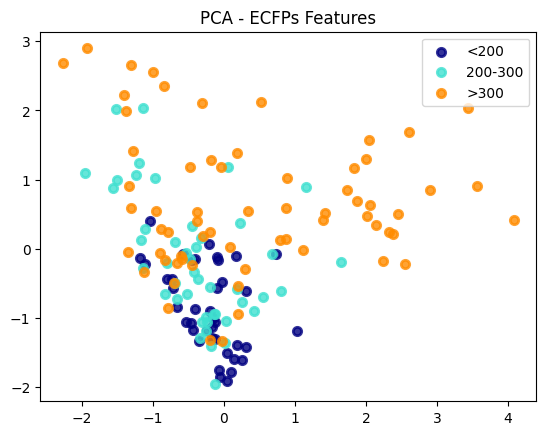

In [41]:
X = np.array(chemical_df.ECFP.to_list())


pca = PCA(n_components=2)  # Reducing data to 5 components for visualization
X_pca = pca.fit_transform(X)

# Plotting the results
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], ['<200','200-300', '>300']):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i,1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA - ECFPs Features')
plt.show()

#### Conclusion:

PCA is a powerful technique, especially useful when dealing with high-dimensional datasets. While it offers a lower-dimensional view of your data, preserving as much variance as possible, remember that each principal component might not have a clear interpretation in terms of the original features. Always consider the trade-off between interpretability and dimensionality reduction.
Here are some of the primary assumptions of PCA and examples of how they might be violated:

**Linearity**:
- **Assumption:** PCA assumes that the data's underlying structure is linear, i.e., the data can be linearly transformed to a lower-dimensional space.
- **Violation Example:** If the data is fundamentally nonlinear (e.g., data that forms a manifold structure like a spiral), PCA might not capture the primary modes of variability effectively.

**Large Variance Means More Importance**:
- **Assumption:** PCA assumes that the components with the largest variance are the most "important" or informative.
- **Violation Example:** If you have a dataset where the crucial information is captured by features with low variance, PCA could de-emphasize or even discard this information. For example, in an image dataset where subtle color changes are important, but the variance in color is low compared to variance in shapes.

**Data is Centered**:
- **Assumption:** PCA requires that the mean of the dataset's attributes be zero (i.e., data should be centered).
- **Violation Example:** If you forget to standardize or center the data before applying PCA, the first principal component might not capture the direction of maximum variance and might instead be closely aligned with the data's mean.

**Orthogonal Transformation**:
- **Assumption:** PCA transforms the original variables into a set of new orthogonal variables (principal components).
- **Violation Example:** While this is a result of PCA rather than an assumption per se, if the real underlying factors in your data are not orthogonal to each other, the interpretation of the principal components becomes challenging.

Ensure data preprocessing is appropriately done, and always validate the results of PCA with domain knowledge when possible.


----
### Fast Independent Component Analysis (FastICA)

FastICA is a computational method used to separate a multivariate signal into additive, independent (non-Gaussian) components. It's mainly used for blind source separation. One common application is in separating mixed signals.

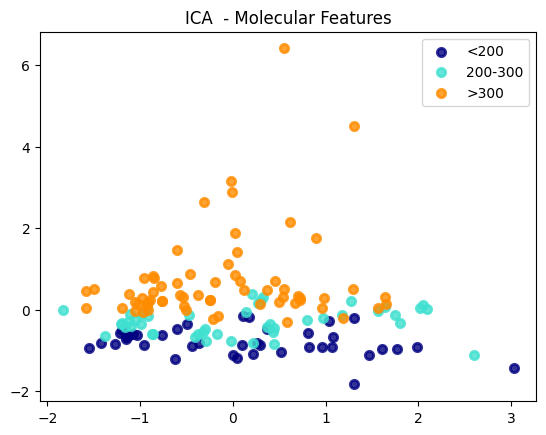

In [42]:
# Importing necessary libraries
from sklearn.decomposition import FastICA

X = chemical_df[['NumValenceElectrons', 'MaxPartialCharge', 'MinPartialCharge']]
X = StandardScaler().fit_transform(X)

# Applying ICA
ica = FastICA(n_components=2)  # Reducing data to 2 components for visualization
X_ica = ica.fit_transform(X)

# Plotting the results
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], ['<200','200-300', '>300']):
    plt.scatter(X_ica[y == i, 0], X_ica[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('ICA  - Molecular Features')
plt.show()

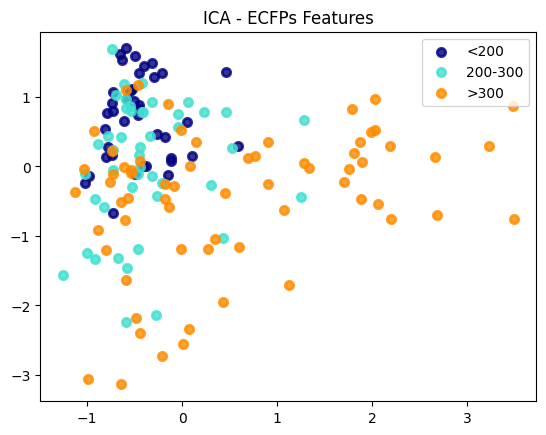

In [43]:
X = np.array(chemical_df.ECFP.to_list())

ica = FastICA(n_components=2,)  # Reducing data to 2 components for visualization
X_ica = ica.fit_transform(X)

# Plotting the results
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], ['<200','200-300', '>300']):
    plt.scatter(X_ica[y == i, 0], X_ica[y == i,1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('ICA - ECFPs Features')
plt.show()

#### Conclusion 

FastICA (Fast Independent Component Analysis) is an algorithm designed for blind source separation or independent component analysis (ICA). The primary goal of ICA is to decompose a multivariate signal into additive, independent (non-Gaussian) components. FastICA achieves this by leveraging the non-Gaussian nature of the signals and maximizes the non-Gaussianity of the estimated components.

Here are some assumptions behind FastICA and possible violations:

**Statistical Independence**:
- **Assumption:** The sources are statistically independent from each other.
- **Violation Example:** If you have mixed signals where some of the original sources are dependent on each other, FastICA might struggle to separate them effectively.

**Non-Gaussianity**:
- **Assumption:** At most one of the source signals can be Gaussian, because independent Gaussian variables are rotationally symmetric, making the source separation not unique.
- **Violation Example:** If multiple mixed source signals are Gaussian, FastICA might not be able to recover the original signals.

It's worth noting that while FastICA has these assumptions, it remains a robust and widely-used method for ICA, especially when the assumptions align well with the nature of the data.

----
![Clustering](images/Cluster.png)

## Clustering

### k-Means Clustering

k-Means is an unsupervised learning algorithm that tries to cluster data based on their similarity. It partitions the data into 
*k* distinct non-overlapping clusters based on their distances from the centers of these clusters.

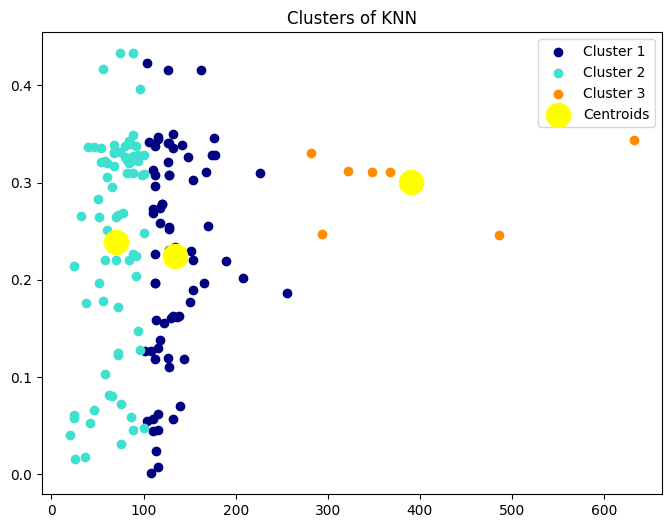

In [44]:
# Importing necessary libraries
from sklearn.cluster import KMeans
X = np.array(chemical_df[['NumValenceElectrons', 'MaxPartialCharge', 'MinPartialCharge']])


# Applying k-Means clustering
kmeans = KMeans(n_clusters = 3, )  # We'll use 3 clusters as there are 3 classes 
y_kmeans = kmeans.fit_predict(X)



plt.figure(figsize=(8,6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1],  c=colors[0], label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1],  c=colors[1], label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], c=colors[2], label='Cluster 3')

# Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.legend()
plt.title('Clusters of KNN')
plt.show()

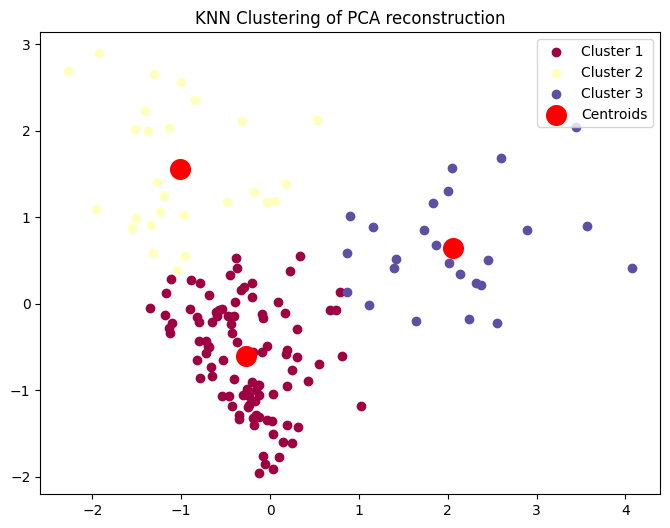

In [45]:
# Importing necessary libraries
from sklearn.cluster import KMeans

X = np.array(chemical_df.ECFP.to_list())


# Applying PCA dimension reduction

pca = PCA(n_components=2)  # Reducing data to 2 components for visualization
X_pca = pca.fit_transform(X)

# Applying k-Means clustering
kmeans = KMeans(n_clusters = 3)  # We'll use 3 clusters as there are 3 classes 
y_kmeans = kmeans.fit_predict(X_pca)

colors = plt.cm.Spectral(np.linspace(0, 1, 3))

plt.figure(figsize=(8,6))
plt.scatter(X_pca[y_kmeans == 0, 0], X_pca[y_kmeans == 0, 1],  c=colors[0], label='Cluster 1')
plt.scatter(X_pca[y_kmeans == 1, 0], X_pca[y_kmeans == 1, 1],  c=colors[1], label='Cluster 2')
plt.scatter(X_pca[y_kmeans == 2, 0], X_pca[y_kmeans == 2, 1], c=colors[2], label='Cluster 3')

# Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.legend()
plt.title('KNN Clustering of PCA reconstruction')
plt.show()

#### Conclusion 
K-Means clustering is one of the most commonly used clustering algorithms. It partitions data into \(k\) clusters, each described by the mean of the samples in the cluster. Like other algorithms, k-Means operates under certain assumptions, and its performance can be compromised if these assumptions aren't met. Here's a breakdown of these assumptions and their potential violations:

**Spherical Cluster Shape**:
- **Assumption:** K-Means assumes that the clusters are spherical and equally sized. It measures the distance of each point from the centroid, so clusters are formed based on "circular" (or "spherical" in higher dimensions) distances from that centroid.
- **Violation Example:** If your clusters are elongated or have irregular shapes, k-Means might not capture them well. It might split an elongated cluster into two or more smaller spherical clusters.

**Cluster Size**:
- **Assumption:** K-Means assumes clusters of approximately similar sizes. The algorithm tends to be biased towards larger clusters.
- **Violation Example:** If you have one large cluster in the middle and several smaller clusters around it, k-Means might partition the large cluster incorrectly, trying to balance the cluster sizes.

**Clusters' Density**:
- **Assumption:** The algorithm assumes that the clusters have somewhat uniform densities.
- **Violation Example:** If you have clusters of varying densities close to each other, k-Means may group denser clusters together or fragment sparse clusters.

**Number of Clusters, \(k\)**:
- **Assumption:** You need to specify \(k\), the number of clusters, in advance.
 - **Violation Example:** If you pick the wrong \(k\), k-Means will try to force the data into that many clusters, which might not represent the actual underlying patterns. This necessitates methods like the elbow method or silhouette analysis to determine an appropriate \(k\).


----
### Affinity Propagation AP:

AP is an unsupervised learning algorithm for clustering that doesn't require the number of clusters to be specified beforehand. It works by considering all data points as potential exemplars and then recursively exchanging real-valued messages between data points until a high-quality set of exemplars and corresponding clusters gradually emerges. Cluster centers are real examples in the data set.

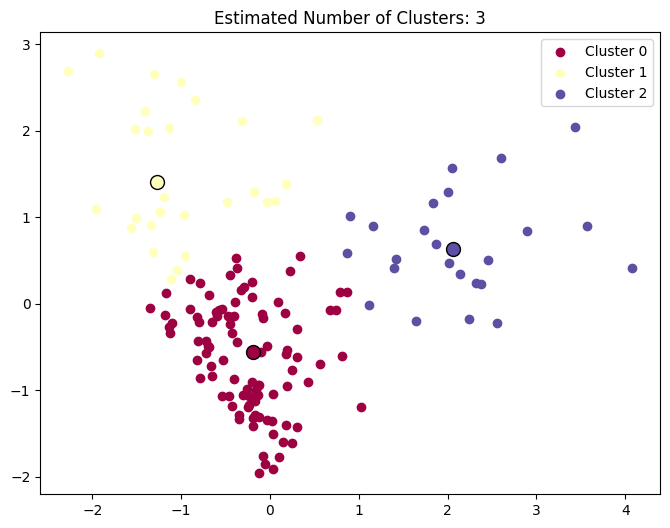

In [46]:
# Importing necessary libraries
from sklearn.cluster import AffinityPropagation

X = np.array(chemical_df.ECFP.to_list())

pca = PCA(n_components=2)  # Reducing data to 2 components for visualization
X_pca = pca.fit_transform(X)


# Applying Affinity Propagation
aff_propagation = AffinityPropagation(preference=-50, random_state=42)
aff_labels = aff_propagation.fit_predict(X_pca)

# Unique cluster labels and their centers
cluster_centers_indices = aff_propagation.cluster_centers_indices_
n_clusters = len(cluster_centers_indices)

# Plotting cluster membership
plt.figure(figsize=(8,6))


colors = plt.cm.Spectral(np.linspace(0, 1, n_clusters))
for k, col in zip(range(n_clusters), colors):
    class_members = (aff_labels == k)
    cluster_center = X_pca[cluster_centers_indices[k]]
    plt.scatter(X_pca[class_members, 0], X_pca[class_members, 1], color=col, label='Cluster '+ str(k))
    plt.scatter(cluster_center[0], cluster_center[1], s=100,  color=col, edgecolors='black')


plt.legend()

plt.title(f'Estimated Number of Clusters: {n_clusters}')
plt.show()

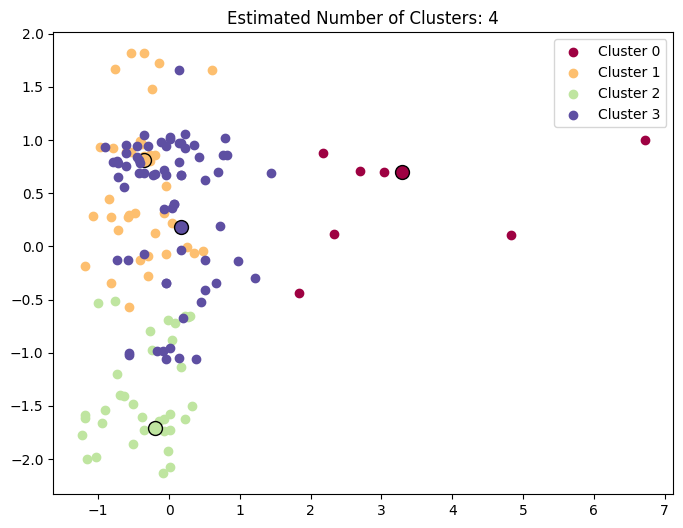

In [47]:
from sklearn.cluster import AffinityPropagation
from sklearn.preprocessing import StandardScaler


X = np.array(chemical_df[['NumValenceElectrons', 'MaxPartialCharge', 'MinPartialCharge']])
# scaling required
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Applying Affinity Propagation
aff_propagation = AffinityPropagation(preference=-50, random_state=42)
aff_labels = aff_propagation.fit_predict(X)

# Unique cluster labels and their centers
cluster_centers_indices = aff_propagation.cluster_centers_indices_
n_clusters = len(cluster_centers_indices)


# Plotting cluster membership
plt.figure(figsize=(8,6))



colors = plt.cm.Spectral(np.linspace(0, 1, n_clusters))
for k, col in zip(range(n_clusters), colors):
    class_members = (aff_labels == k)
    cluster_center = X[cluster_centers_indices[k]]
    plt.scatter(X[class_members, 0], X[class_members, 1], color=col, label='Cluster '+ str(k))
    plt.scatter(cluster_center[0], cluster_center[1], s=100,  color=col, edgecolors='black')



plt.legend()

plt.title(f'Estimated Number of Clusters: {n_clusters}')
plt.show()

#### Conclusion

Affinity Propagation is a clustering algorithm that doesn't require pre-specifying the number of clusters. Instead, it works by considering all data points as potential exemplars and recursively exchanging real-valued messages between data points until a high-quality set of exemplars and corresponding clusters gradually emerges.

Despite its elegance and efficiency, certain assumptions or conditions need to be satisfied for Affinity Propagation to work effectively:

**Uniform Density Assumption**:
- **Assumption:** Affinity Propagation assumes a relatively uniform density across clusters. If the clusters have significantly varied densities, it may struggle.
- **Violation Example:** Consider a dataset where some clusters are very tightly packed while others are spread out. Affinity Propagation might incorrectly divide the spread-out clusters or combine the denser ones.

**Noise and Outliers**:
- **Assumption:** The algorithm assumes that noise and outliers are minimal or that they don't form their own clusters.
- **Violation Example:** If your dataset has significant noise or many outliers, Affinity Propagation may treat them as valid clusters, leading to over-segmentation.

**Homogeneity of Cluster Sizes**:
- **Assumption:** There's an underlying expectation that clusters will be somewhat similarly sized.
- **Violation Example:** If there's a mixture of a few large clusters and many tiny clusters, the algorithm might not perform optimally.



---
![Regression](images/Regress.png)

## Regression 

Regression is a supervised learning approach where the aim is to predict the continuous output variable based on one or more predictor variables. 
Here, I'll provide examples for some of the common regression techniques:

### Linear Regression: 

Linear regression is one of the simplest and most widely used techniques in machine learning and statistics. It's used to predict the value of a dependent variable based on one or more independent variables.

**Objective of Linear Regression**

To fit the best line (in case of simple linear regression) or hyperplane (in case of multiple linear regression) that predicts the output value within minimal error.

**Equation**

Simple Linear Regression:

$y = mx + c $

Where:

- $ y $ is the dependent variable we want to predict.
- $ x $ is the independent variable.
- $ m $ is the slope of the line.
- $ c $ is the y-intercept.



**Implementation in Python using `sklearn`:**

In [48]:
# Import necessary libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

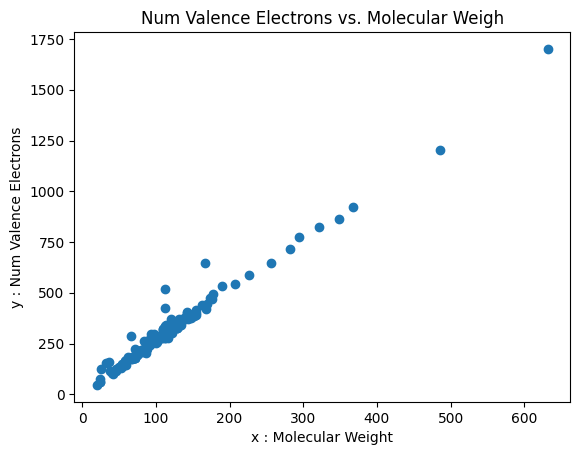

In [49]:
# Visualize the dataset:
data = chemical_df[['MolWt','NumValenceElectrons', 'MaxPartialCharge', 'MinPartialCharge']]


plt.scatter(data['NumValenceElectrons'], data['MolWt'])
plt.xlabel('x : Molecular Weight')
plt.ylabel('y : Num Valence Electrons')
plt.title('Num Valence Electrons vs. Molecular Weigh')
plt.show()

In [50]:
# Splitting the dataset and take 20% for testing:
X = data['NumValenceElectrons'].values.reshape(-1, 1)
y = data['MolWt'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [51]:
# Training the Linear Regression model:

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [52]:
# Making Predictions:

y_pred = regressor.predict(X_test)

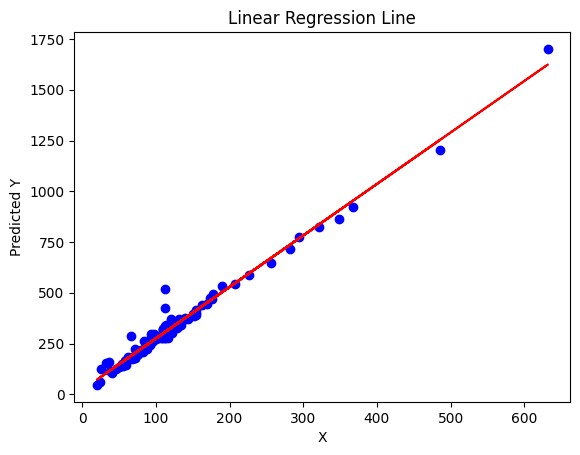

In [53]:
# Visualizing the Linear Regression line:

plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, regressor.predict(X_train), color='red')
plt.xlabel('X')
plt.ylabel('Predicted Y')
plt.title('Linear Regression Line')
plt.show()

In [54]:
# Evaluating the Model:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1698.0563518922233


#### Conclusion:

Linear regression is a fundamental algorithm in machine learning and provides a good starting point for regression tasks. Next we explore regularization techniques like Ridge and Lasso.

The assumptions underlying linear regression are essential for the model to produce reliable, unbiased, and interpretable predictions. If these assumptions are not met, then linear regression results might be misleading or inaccurate. Here are the key assumptions of linear regression and examples of their violation:


**Linearity**

- **Assumption:** There's a linear relationship between the dosage of a substance and the observed effect.
- **Violation Example:** In toxicological studies, it's common to see a threshold effect where low doses of a toxin have no effect, but after reaching a certain threshold, the toxic effect increases sharply.

**Independence**

- **Assumption:** Observations from different experimental units or trials are independent of each other.
- **Violation Example:** If multiple samples are taken from the same animal or cell culture, they are not truly independent as they share the same source.

**Homoscedasticity**

- **Assumption:** The variance of the residuals is constant across different dosage levels.
- **Violation Example:** At low doses of a toxin, there might be little variability in response, but at higher doses, the variability might increase due to other unforeseen physiological reactions.

**Normality of Errors**

- **Assumption:** The residuals (errors) are normally distributed.
- **Violation Example:** In dose-response studies, there might be specific doses that lead to unexpected or rare side effects in only a few subjects, leading to skewed residuals.

**No or Little Multicollinearity**

- **Assumption:** Different predictors, like various measures of exposure, are not highly correlated with each other.
- **Violation Example:** If one is using both the concentration of a toxin in blood and urine as predictors for an adverse effect, these two might be highly correlated since both represent systemic exposure levels.

When the assumptions of linear regression are violated, it might be necessary to either transform the data (e.g., log transformation), use different variables, or switch to a more robust regression or modeling technique that doesn't have these assumptions.

----

### Random Forest Regression 

Random Forest is an ensemble learning method that can be used for both regression and classification tasks. In this tutorial, we'll focus on using the Random Forest algorithm for regression. The basic idea behind Random Forest is to combine multiple decision trees in determining the final output rather than relying on individual decision trees.

Advantages of Random Forest Regression:
- It can handle large data sets with higher dimensionality.
- It can handle missing values.
- Overfitting is less of an issue thanks to the averaging process.
- Provides a good indicator of the importance of features.

**Random Forest Regression Implementation in Python using `sklearn`:**



In [55]:
#  Import necessary libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [56]:
# Training the Random Forest Regression model with the same data set as in the previous example
# 
# You can set the number of trees in your forest with the `n_estimators` parameter. For instance, `n_estimators=100` will train the model with 100 trees.

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=0)
rf_regressor.fit(X_train, y_train)



RandomForestRegressor(random_state=0)

In [57]:
# Making Predictions:
y_pred = rf_regressor.predict(X_test)

In [58]:
#  Evaluating the Model:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1982.6812507889429


**RF Feature Importance:**
Random forest regressors can provide an indication of the importance of features. 

#### Conclusion:

Random Forest Regression offers a versatile and easy-to-use algorithm for many regression tasks. Its ability to handle large datasets, 
importance scoring of features, and robustness against overfitting makes it a valuable tool for any data scientist's toolkit. 
Remember to experiment with parameters like `n_estimators`, `max_depth`, and others to find the optimal settings for your specific problem.


The Random Forest algorithm is a tree-based ensemble method and doesn't rely on the same assumptions as linear regression. However, there can still be issues or pitfalls in applying the method, especially in the context of toxicological experiments. Let's examine the potential pitfalls:

**Non-linearity**
- **Random Forest Strength:** Random forests can capture non-linear relationships, so non-linearity is not inherently an issue.
- **Pitfall Example:** Just like the threshold effect in toxicological studies (low doses of a toxin have no effect but after a threshold, the effect increases sharply), random forests can capture this without needing a transformation.

**Independence**
- **Issue:** Observations from different experimental units or trials should ideally be independent.
- **Pitfall Example:** If multiple samples are taken from the same animal or cell culture, they are not truly independent. While random forests can handle some dependence better than linear models, highly dependent data can still lead to overfitting.

**Homogeneous Data**
- **Issue:** Random forests can struggle if the training set is not representative of the data it predicts. This is not homoscedasticity, but more about the homogeneity of data.
- **Pitfall Example:** If the training set primarily consists of low-dose observations, the model may perform poorly on high-dose predictions.

**Outliers**
- **Issue:** Random forests are relatively robust to outliers in the predictor variables but can be sensitive to outliers in the response variable.
- **Pitfall Example:** If a few animals have extremely rare and severe reactions to a toxin, this can skew the tree splits and influence the ensemble's aggregated prediction.

**Multicollinearity**
- **Random Forest Strength:** Random forests handle multicollinearity better than linear models, but highly correlated predictors can still overshadow or mask the importance of individual features.
- **Pitfall Example:** If both blood and urine concentrations of a toxin are used as predictors, one might be deemed "more important" just due to slight data variations, even if they're conveying similar information.


---
![Classification](images/Class.png)

## Classification 

### Logistic Regression

Logistic Regression is a supervised machine learning algorithm used for binary (and multinomial) classification tasks. While its name includes "regression," it's used for classification rather than predicting continuous values.

**Key Concepts:**

- **Sigmoid Function**: At its core, logistic regression uses the sigmoid function to squash the output of any line of best fit between 0 and 1, which can then be interpreted as a probability.
- **Binary Classification**: The output represents the probability that a given instance belongs to a particular category.

**Advantages of Logistic Regression**

- It's simple, interpretable, and provides probabilities for outcomes.
- Performs well for linearly separable categories.
- Can handle linear relationships between predictors and log odds of output.

**Logistic Regression Implementation in Python using `sklearn`**

In [59]:
### 1. Import necessary libraries:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [60]:
# Load dataset
data = chemical_df[['MolWt','NumValenceElectrons', 'MaxPartialCharge', 'MinPartialCharge']]

X = data.drop('MolWt', axis=1).values  # Features

y = pd.cut(chemical_df.MolWt, [0,270,5000], labels=[0, 1], ordered= False)   # Target variable

# split data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train, y_train)



LogisticRegression()

In [62]:
# Make predictions:
# Predict the class labels for the test set
y_pred = log_reg.predict(X_test)


# Evaluate the model:

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")
print(classification_report(y_test, y_pred))

Accuracy: 90.32%
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        17
           1       0.92      0.86      0.89        14

    accuracy                           0.90        31
   macro avg       0.91      0.90      0.90        31
weighted avg       0.90      0.90      0.90        31



In [63]:
log_reg.predict_proba(X_test)

array([[9.99917660e-01, 8.23403861e-05],
       [9.93188248e-01, 6.81175215e-03],
       [9.99987280e-01, 1.27196734e-05],
       [1.08261494e-02, 9.89173851e-01],
       [9.16317097e-01, 8.36829028e-02],
       [9.99999998e-01, 1.93849335e-09],
       [9.16285902e-01, 8.37140980e-02],
       [9.54446634e-01, 4.55533658e-02],
       [9.99908483e-01, 9.15165997e-05],
       [0.00000000e+00, 1.00000000e+00],
       [9.99987796e-01, 1.22036495e-05],
       [1.00000000e+00, 2.70620722e-10],
       [6.24918569e-01, 3.75081431e-01],
       [0.00000000e+00, 1.00000000e+00],
       [1.64284971e-03, 9.98357150e-01],
       [1.15541354e-10, 1.00000000e+00],
       [9.99694492e-01, 3.05508448e-04],
       [2.90183889e-03, 9.97098161e-01],
       [7.98688799e-07, 9.99999201e-01],
       [6.54068613e-02, 9.34593139e-01],
       [9.99999993e-01, 6.91308241e-09],
       [8.64207663e-04, 9.99135792e-01],
       [9.99846363e-01, 1.53636685e-04],
       [9.99996364e-01, 3.63598763e-06],
       [1.074245

#### Conclusion

Logistic Regression is a foundational algorithm for classification tasks in machine learning. Its simplicity and interpretability make it a good choice, especially for problems where understanding the influence of each feature is crucial. However, for non-linearly separable data or complex datasets, more sophisticated models might perform better. Take the following assumptions into account, when these assumptions are not met, the validity of the model's outputs may be compromised.

**Linearity of Log Odds**:
- **Assumption**: The log odds of the outcome is a linear combination of the predictor variables.
 - **Toxicology Violation Example**: Suppose you're studying the effect of a chemical compound on an organism. At low and high doses, there might be clear effects (low effect at low doses, high effect at high doses), but there might be a threshold dose where the effect drastically changes. This nonlinear relationship violates the linearity assumption.
    
**Independence of Errors**:
- **Assumption**: The observations are independent of each other.
- **Toxicology Violation Example**: If you are studying the effect of a toxin on multiple organisms, but some organisms are from the same family or were subjected to the same conditions, their responses might not be independent, violating this assumption.

**Binary Outcome**:
- **Assumption**: The outcome variable is binary.
- **Toxicology Violation Example**: If you're trying to predict the severity of symptoms after exposure to a chemical and the severity is on a scale (e.g., 1-5), the outcome is ordinal, not binary. 


----


### Support Vector Machines (SVM)

Support Vector Machines (SVM) are powerful supervised machine learning algorithms used for classification and regression. They aim to find the hyperplane (or set of hyperplanes in multiclass problems) that best separates different classes of data.

**Key Concepts**

- **Hyperplane**: A decision boundary that tries to best segregate two classes.
  
- **Support Vectors**: Data points that are closest to the hyperplane and influence its orientation and position.
  
- **Margin**: The distance between the hyperplane and the nearest data point from either class. SVMs aim to maximize this margin.
  
- **Kernel Trick**: SVM can use a function to map non-linearly separable data to a higher dimension where it becomes linearly separable. This function is called a kernel (e.g., polynomial, radial basis function, sigmoid).

**Advantages of SVM**

- Effective in high-dimensional spaces.
- Robust against overfitting, especially in high-dimensional spaces.
- Can be used for non-linear decision boundaries thanks to the kernel trick.

**SVM Implementation in Python using `sklearn`**


In [64]:
# Import  libraries:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler

# Load dataset
data = chemical_df[['MolWt','NumValenceElectrons', 'MaxPartialCharge', 'MinPartialCharge']]

X = data.drop('MolWt', axis=1).values  # Features
#X = scaler.fit_transform(X)
y = pd.cut(chemical_df.MolWt, [0,270,5000], labels=[0, 1], ordered= False)   # Target variable

# split data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
# Train the SVM model:

## Using the Radial Basis Function (RBF) kernel as an example, try other kernels, linear, poly.
# Initialize the SVM model
svm_model = SVC(kernel='rbf', C=1, gamma='scale')
# Train the model
svm_model.fit(X_train, y_train)



SVC(C=1)

In [66]:
# Make predictions:

# Predict the class labels for the test set
y_pred = svm_model.predict(X_test)


# Evaluate the model:

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")
print(classification_report(y_test, y_pred))

Accuracy: 93.55%
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       0.93      0.93      0.93        14

    accuracy                           0.94        31
   macro avg       0.93      0.93      0.93        31
weighted avg       0.94      0.94      0.94        31



#### Conclusion:

SVM is a versatile algorithm that's particularly useful when the data has many features or when the classes are hard to separate. By using different kernels, SVM can be adapted to classify both linear and non-linear data. 
SVMs are sensitive to the choice of parameters (like `C` and `gamma`), so parameter tuning and cross-validation are often essential for obtaining the best results.

Keep these potential issues in mind:

**Feature Scale Sensitivity**:
- **Assumption**: SVMs work best when the features are on a similar scale.
- **Violation Example**: Imagine trying to predict the toxicity of a chemical based on molecular features. One feature might be molecular weight (a relatively large value) and another feature might be a binary representation of the presence of a certain atom (0 or 1). If these features are not scaled appropriately, the SVM might overly prioritize molecular weight because of its larger scale.

**Large Dataset Performance**:
- **Assumption**: SVMs tend to perform better on smaller to medium datasets.
- **Violation Example**: In a large-scale screening of chemicals for toxicological properties, you might have millions of samples. Training an SVM on such a vast dataset might be computationally intensive and time-consuming.

**Choice of Kernel & Parameters**:
- **Assumption**: A suitable kernel and appropriate parameters (like `C`, `gamma`) need to be chosen.
- **Violation Example**: In assessing the toxic effects of mixtures of chemicals, interactions might be complex and non-linear. Choosing the wrong kernel or not optimizing the parameters could lead to subpar model performance.

**Multiclass Problems**:
- **Assumption**: Standard SVM is designed for binary classification.
- **Toxicology Violation Example**: If you're trying to classify a chemical's effect into multiple toxicity categories (e.g., non-toxic, slightly toxic, highly toxic), you'd need to adapt SVM for multi-class problems using techniques like one-vs-one or one-vs-rest.


---
![Model evaluation](images/ModelEval.png)

## Model evaluation 


Model evaluation is crucial for any machine learning pipeline. Once a model has been trained, it's essential to assess its performance to determine its reliability, accuracy, and generalizability to unseen data. Here, we'll delve into the key concepts and techniques associated with model evaluation.


### Accuracy

- **Concept**: Accuracy measures the fraction of correct predictions made by the model out of all predictions. It's suitable for balanced datasets but can be misleading for imbalanced datasets.
  


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)


In [68]:

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 90.32%


### Confusion Matrix

- **Concept**: A table used to describe the performance of a classification model on a set of data for which the true values are known. It provides values of True Positives, True Negatives, False Positives, and False Negatives.
  


In [69]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

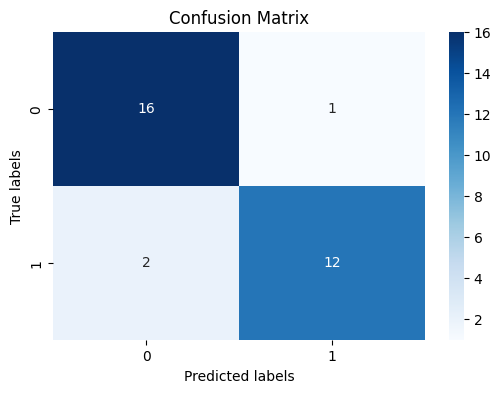

In [70]:
# Plot the confusion matrix for better visualization
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Precision, Recall, and F1-Score

- **Precision**: The number of true positive results divided by the number of all positive results.
- **Recall (Sensitivity)**: The number of true positive results divided by the number of positive results that should have been identified.
- **F1-Score**: The harmonic mean of precision and recall.


In [71]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        17
           1       0.92      0.86      0.89        14

    accuracy                           0.90        31
   macro avg       0.91      0.90      0.90        31
weighted avg       0.90      0.90      0.90        31



### ROC Curve and AUC

- **Concept**: ROC (Receiver Operating Characteristic) curve illustrates the diagnostic ability of a binary classifier, while AUC (Area Under the Curve) gives the scalar value of the performance.
  


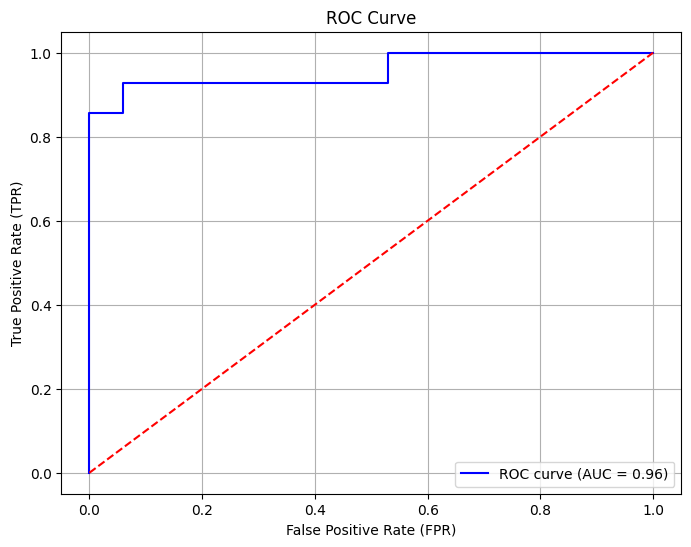

In [72]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_probabilities = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probabilities)
auc = roc_auc_score(y_test, y_pred_probabilities)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for reference
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### Mean Absolute Error, Mean Squared Error, and R-Squared for Regression
**Concept**: These metrics evaluate the performance of regression models.

**Mean Absolute Error (MAE)**: The average of the absolute differences between the predicted and actual values.

$ \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| $

Where:
- $ n $ is the number of observations.
- $ y_i $ is the actual value for the ith observation.
- $ \hat{y}_i $ is the predicted value for the ith observation.

**Mean Squared Error (MSE)**: The average of the squared differences between the predicted and actual values.

$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$

Where:
- $ n $ is the number of observations.
- $ y_i $ is the actual value for the ith observation.
- $ \hat{y}_i $ is the predicted value for the ith observation.


**R-Squared**: Represents the proportion of the variance for the dependent variable that's explained by independent variables in the model. 

$ R^2 = 1 - \frac{\text{SS}_{\text{res}}}{\text{SS}_{\text{tot}}} $

Where:

- $ \text{SS}_{\text{res}} $ is the sum of squares of the residuals: $ \sum_{i} (y_i - \hat{y}_i)^2 $
- $ \text{SS}_{\text{tot}} $ is the total sum of squares: $\sum_{i} (y_i - \bar{y})^2 $
- $ y_i $ is the actual value for the ith observation.
- $ \hat{y}_i $ is the predicted value for the ith observation.
- $ \bar{y} $ is the mean of the observed data.
      

In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y = data['MolWt'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean absolute error: {mae:.2f}")
print(f"Mean squared error: {mse:.2f}")
print(f"R2 score: {r2:.2f}")


Mean absolute error: 23.22
Mean squared error: 1712.15
R2 score: 0.88


### Conclusion:

Model evaluation not only provides insights into the accuracy and reliability of your machine learning model but also indicates areas for improvement. 

----
![Pipeline](images/pipelines.png)

# Using Pipeline in Scikit-learn

In `scikit-learn`, a pipeline bundles together a sequence of data processing steps and modeling into a single object. Each step in the pipeline is represented by its name that is used to identify the step, and the second element is an instance of the transform or model.

Pipelines offer several advantages:
1. They help in **code organization** by keeping the data processing and modeling steps in one place.
2. They prevent **data leakage** by ensuring that data transformations and preprocessing steps are applied consistently both during training and prediction.
3. They make the code more **readable and reusable**.

Here's how to create and use a pipeline:



In [74]:
#: Building a Pipeline for Preprocessing and Classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Load dataset
data = chemical_df[['MolWt','NumValenceElectrons', 'MaxPartialCharge', 'MinPartialCharge']]
X = data.drop('MolWt', axis=1).values  # Features
y = pd.cut(chemical_df.MolWt, [0,270,5000], labels=[0, 1], ordered= False)

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),         # Step 1: Scale the data
    ('reduce_dim', PCA(n_components=3)),  # Step 2: Dimensionality reduction
    ('classifier', RandomForestClassifier()) # Step 3: Train a classifier
])

# Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# Evaluate the pipeline on the test data
score = pipeline.score(X_test, y_test)
print(f'Test accuracy: {score:.2f}')

Test accuracy: 0.87


## Using Pipeline wiht GridSearchCV for hyperparameter tuning
When combined with pipelines, you can ensure that the entire workflow, from preprocessing to model training, is consistent and free from data leakage.

In this example, we'll use GridSearchCV for hyperparameter tuning combined with a pipeline. We'll continue with chemical_df dataset and the pipeline that scales data, performs PCA, and then fits a RandomForestClassifier.

In [76]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('reduce_dim', FastICA()),
    ('classifier', RandomForestClassifier())
])

# Create parameter grid for GridSearchCV
param_grid = {
    'reduce_dim__n_components': [1, 2, 3],
    'classifier__n_estimators': [10, 20, 50],
    'classifier__max_depth': [None, 10, 20],
}

# Create GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5)

# Train the GridSearchCV object
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best parameters found: ", grid_search.best_params_)

# Evaluate on test data
score = grid_search.score(X_test, y_test)
print(f'Test accuracy with best params: {score:.2f}')

Best parameters found:  {'classifier__max_depth': None, 'classifier__n_estimators': 10, 'reduce_dim__n_components': 3}
Test accuracy with best params: 0.90


# Code example:  Ames Mutagenicity Prediction

In [77]:
import pandas as pd
from rdkit.Chem import AllChem
from rdkit import Chem
import numpy as np

ames = pd.read_table("data/ames.tab")

In [78]:
ames.isna().sum()

Unnamed: 0      0
Drug_ID         0
Drug            1
Y               1
Dosage_Level    0
dtype: int64

In [79]:
ames.dropna(inplace=True)
ames.isna().sum()

Unnamed: 0      0
Drug_ID         0
Drug            0
Y               0
Dosage_Level    0
dtype: int64

In [80]:
ames.Y.describe()

count    7299.000000
mean        0.546239
std         0.498167
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: Y, dtype: float64

In [81]:
ames = ames[ames.Y<2.0]
ames.describe()

,Unnamed: 0,Y
count,7298.000000,7298.00000
mean,3648.500822,0.54604
std,2106.896889,0.49791
min,0.000000,0.00000
25%,1824.250000,0.00000
50%,3648.500000,1.00000
75%,5472.750000,1.00000
max,7299.000000,1.00000


In [82]:
ames['Molecule'] = ames['Drug'].apply(Chem.MolFromSmiles)

In [83]:
radius = 2
nBits = 1024
# converts molecule object to ECFP as a new column 
ames['ECFP'] = ames['Molecule'].apply(AllChem.GetMorganFingerprintAsBitVect, args=(radius, nBits)) 
# converts bitstring to list 
ames['ECFP'] = ames['ECFP'].apply(lambda x: np.asarray(x.ToList()))

,Unnamed: 0,Drug_ID,Drug,Y,Dosage_Level,Molecule,ECFP
0,0,Drug 0,O=[N+]([O-])c1ccc2ccc3ccc([N+](=O)[O-])c4c5ccc...,1.0,low,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,Drug 1,O=[N+]([O-])c1c2c(c3ccc4cccc5ccc1c3c45)CCCC2,1.0,mid,,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2,Drug 2,O=c1c2ccccc2c(=O)c2c1ccc1c2[nH]c2c3c(=O)c4cccc...,0.0,high,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,3,Drug 3,[N-]=[N+]=CC(=O)NCC(=O)NN,1.0,low,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,4,Drug 4,[N-]=[N+]=C1C=NC(=O)NC1=O,1.0,high,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."

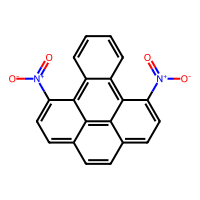
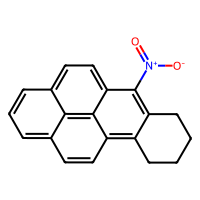
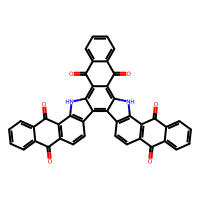
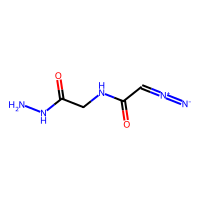
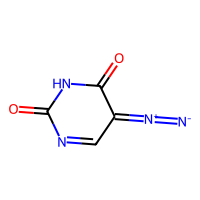

In [84]:
ames.head()

In [85]:
from sklearn.model_selection import train_test_split

y = ames.Y
X = np.array(ames.ECFP.to_list())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [86]:
# build a logistic regression classifier
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

In [87]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 78.36%


In [88]:
# build a SVM classifier
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', C=10, gamma='scale')
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

In [89]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 82.33%


----
![Happy Coding](images/HappyCoding.png)

# Conclusion

Throughout this tutorial, we've used libraries like `pandas`, `RDKit`, and `scikit-learn`, we've scratched topics such as data preprocessing, feature generation, and model building.

**Key Takeaways:**
- **Data Preprocessing** is foundational. Effective data cleaning, merging, and transformation in `pandas` can have a significant impact on the subsequent modeling steps.
- **Feature Engineering** is an art. Using `RDKit`, we learned to generate molecular features, which is the working horse for many tasks which involve molecules.
- **Model Building** isn't a one-size-fits-all. From clustering, regression, classification, to dimensionality reduction, choosing the right model and understanding its underlying assumptions is crucial.
- **Pipelines and Hyperparameter Tuning** are game-changers. They not only streamline the modeling process but also prevent potential data leakage, ensuring the robustness of our model.

**Advice for Going Forward:**
- **Practice Regularly**: As with any skill, practice is key. Keep working on various datasets to fine-tune your understanding.
- **Stay Curious**: New algorithms, techniques, and best practices emerge regularly, play with them.
